#### Deep Learning

+ A model processes data and learns to predict labels 
+ The model optimizes through a training loop
+ New dummy data is generated for each training loop
+ Use multiple models like a DNN
+ Introduce Transformer model


#### Imports

In [1]:
import numpy as np   
import os              
import sys
import random
import tensorflow as tf
from IPython.display import clear_output

main_path = os.path.dirname(os.getcwd())

eegyolk_path = os.path.join(main_path, 'eegyolk')
sys.path.insert(0, eegyolk_path)
from eegyolk import dummy_data_functions as dummy
from eegyolk import display_helper as disp

from models.Transformer import TransformerModel
from models.DNN import NN, DNN

#### Initialise and Compile Models

+ Fully connected feedforward Neural Network (NN) 
+ Transformer model (https://github.com/SuperBruceJia/EEG-DL/blob/master/Models/main-Transformer.py)


In [2]:
simpleModel = NN()
transformerModel = TransformerModel()


simpleModel.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True))

# simpleModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
#               loss="binary_crossentropy",
#               metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Recall()])
transformerModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss="binary_crossentropy",
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Recall()])

#### Training loop:

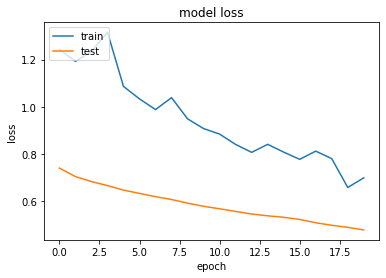

In [3]:
model = transformerModel      # simpleModel , transformerModel

X, Y = dummy.create_batch(1000, ["planck", "constant"])

history = model.fit(np.array(X), Y, validation_split=0.33, 
                epochs=20, batch_size=50, verbose=0)

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# for j in range(4):
#   model.fit(np.array(X), Y, epochs=4, batch_size=10)

#   X_test, Y_test = create_batch(batch_size)
#   loss = model.evaluate(np.array(X_test),  Y_test, verbose=2)

#   clear_output(wait=True)


#### Plot Loss 
(Test loss is lower since it has no dropout)

In [4]:
history?

Type:        History
String form: <keras.callbacks.History object at 0x000002426038E520>
File:        c:\floris\python\virtualenvironments\venv\lib\site-packages\keras\callbacks.py
Docstring:  
Callback that records events into a `History` object.

This callback is automatically applied to
every Keras model. The `History` object
gets returned by the `fit` method of models.

Example:

>>> model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
>>> model.compile(tf.keras.optimizers.SGD(), loss='mse')
>>> history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
...                     epochs=10, verbose=1)
>>> print(history.params)
{'verbose': 1, 'epochs': 10, 'steps': 1}
>>> # check the keys of history object
>>> print(history.history.keys())
dict_keys(['loss'])


In [5]:
print(history.history.keys())

dict_keys(['loss', 'precision', 'binary_accuracy', 'recall', 'val_loss', 'val_precision', 'val_binary_accuracy', 'val_recall'])


TODO:
+ Show the confidence of a prediction (with softmax probability between 0 and 1) 
+ Compare multiple models on dummy data (DNN, CNN, RNN, Transformer(Encoder))